<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/UPI_Transaction_Modelling_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Necessary packages are installed successfully!")

Necessary packages are installed successfully!


In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/UPI%20apps%20transaction%20data%20in%202021.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head(10)

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021
5,Airtel Payments Bank Apps,5.79,1534.21,7.36,2342.76,7,2021
6,Airtel Payments Bank Apps,5.06,1323.26,6.69,2821.94,6,2021
7,Airtel Payments Bank Apps,4.06,429.12,4.06,429.12,5,2021
8,Airtel Payments Bank Apps,3.53,363.66,14.70,11172.43,4,2021
9,Airtel Payments Bank Apps,3.79,381.74,3.79,381.74,3,2021


In [7]:
r,c = df.shape
print("Number of rows in the dataframe :",r)
print("Number of columns in the dataframe :",c)

Number of rows in the dataframe : 654
Number of columns in the dataframe : 7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UPI Banks                 654 non-null    object 
 1   Volume (Mn) By Costumers  654 non-null    float64
 2   Value (Cr) by Costumers   654 non-null    float64
 3   Volume (Mn)               654 non-null    float64
 4   Value (Cr)                654 non-null    float64
 5   Month                     654 non-null    int64  
 6   Year                      654 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 35.9+ KB


In [6]:
df.isnull().values.any()

False

In [5]:
df.isnull().sum()

UPI Banks                   0
Volume (Mn) By Costumers    0
Value (Cr) by Costumers     0
Volume (Mn)                 0
Value (Cr)                  0
Month                       0
Year                        0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Volume (Mn) By Costumers,654.0,57.960948,256.842682,0.01,0.0500,0.250,2.3575,2077.60
Value (Cr) by Costumers,654.0,10943.292813,49450.615924,0.41,21.1325,60.640,401.3125,394565.58
Volume (Mn),654.0,60.460321,258.686922,0.01,0.0500,0.250,2.3575,2077.60
Value (Cr),654.0,11134.196682,49588.538504,0.41,21.1325,60.745,407.0625,394565.58
Month,654.0,6.571865,3.488797,1.00,3.2500,7.000,10.0000,12.00
Year,654.0,2021.000000,0.000000,2021.00,2021.0000,2021.000,2021.0000,2021.00


In [19]:
df['UPI Banks'].value_counts()

PhonePe                         12
India Post Payments Bank App    12
Dena Bank App                   12
Kotak Mahindra Bank Apps        12
MakeMy Trip                     12
                                ..
Goibibo                          1
Andhra Bank App                  1
WhatsApp*                        1
Jammu and Kashmir Bank App       1
Freecharge                       1
Name: UPI Banks, Length: 69, dtype: int64

In [20]:
x = df.iloc[:,1].values.reshape(-1,1)
y = df.iloc[:,2].values
print("Show x and y")
print("--------X---------\n")
print(x)
print("--------Y---------\n")
print(y)
print("\n\n")
print("type of data of x :",type(x))
print("type of data of y :",type(y))

Show x and y
--------X---------

[[9.04000e+00]
 [8.41000e+00]
 [7.60000e+00]
 [6.91000e+00]
 [6.14000e+00]
 [5.79000e+00]
 [5.06000e+00]
 [4.06000e+00]
 [3.53000e+00]
 [3.79000e+00]
 [3.33000e+00]
 [3.71000e+00]
 [2.00000e-02]
 [2.00000e-02]
 [2.00000e-02]
 [2.00000e-02]
 [1.00000e-02]
 [1.00000e-02]
 [1.00000e-02]
 [2.00000e-02]
 [5.00000e-02]
 [5.00000e-02]
 [9.00000e-02]
 [7.61800e+01]
 [7.10400e+01]
 [6.88200e+01]
 [6.29000e+01]
 [6.06700e+01]
 [6.28300e+01]
 [5.13400e+01]
 [5.83500e+01]
 [4.91200e+01]
 [5.23800e+01]
 [4.42200e+01]
 [4.63000e+01]
 [2.00000e-02]
 [2.10000e-01]
 [1.70000e-01]
 [1.60000e-01]
 [1.30000e-01]
 [1.00000e-01]
 [8.00000e-02]
 [5.00000e-02]
 [4.00000e-02]
 [4.00000e-02]
 [4.00000e-02]
 [3.00000e-02]
 [2.00000e-02]
 [6.63000e+00]
 [6.71000e+00]
 [8.40000e+00]
 [7.37000e+00]
 [1.01100e+01]
 [1.00800e+01]
 [9.77000e+00]
 [1.02700e+01]
 [9.72000e+00]
 [8.56000e+00]
 [6.72000e+00]
 [5.23000e+00]
 [1.30000e-01]
 [6.00000e-02]
 [6.00000e-02]
 [4.00000e-02]
 [4.000

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = reg.predict(x_test)
print(y_pred)


[ 2.81283464e+02  2.86895731e+05 -1.70844420e+02 -1.65072575e+02
 -1.68920472e+02 -1.59300730e+02 -1.55452833e+02 -1.72768369e+02
  1.08128104e+02  6.15417258e+04  1.26826901e+03  2.79011223e+03
  5.81054442e+01 -1.49680988e+02  1.04432308e+05  6.10278647e+02
 -1.72768369e+02 -1.49680988e+02 -1.63148627e+02 -1.72768369e+02
 -1.68920472e+02 -1.70844420e+02  1.94705784e+02 -1.68920472e+02
  4.07899082e+01 -1.51604936e+02 -1.70844420e+02  1.44142437e+03
 -1.70844420e+02  1.42759176e+02 -1.63148627e+02 -1.66996524e+02
 -1.49680988e+02  3.64013247e+02 -6.69512046e+01  3.25534278e+02
  4.81602994e+03 -6.88751530e+01 -1.68920472e+02 -1.51604936e+02
 -1.66996524e+02 -7.07991015e+01 -8.23427921e+01  8.11928255e+01
 -8.42667406e+01  1.02200361e+03  5.08309380e+02 -1.72768369e+02
 -3.03961842e+01 -1.70844420e+02  5.41016503e+02 -1.63148627e+02
 -1.32365452e+02 -1.51604936e+02 -1.41985194e+02 -1.53528884e+02
 -1.65072575e+02 -1.43909142e+02 -1.53528884e+02  1.77041956e+03
  1.10088550e+03 -1.53528

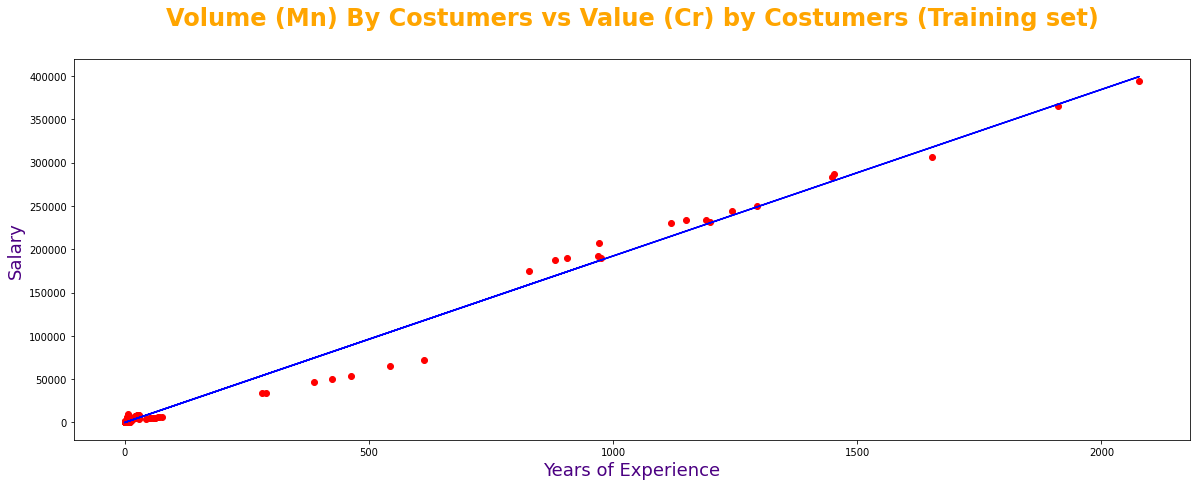

In [29]:
plt.figure(figsize=(20,7))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.xlabel('Years of Experience',size=18,color='indigo')
plt.ylabel('Salary',size=18,color='indigo')
plt.title('Volume (Mn) By Costumers vs Value (Cr) by Costumers (Training set)\n',size=24,color='orange',fontweight='bold')
plt.show()

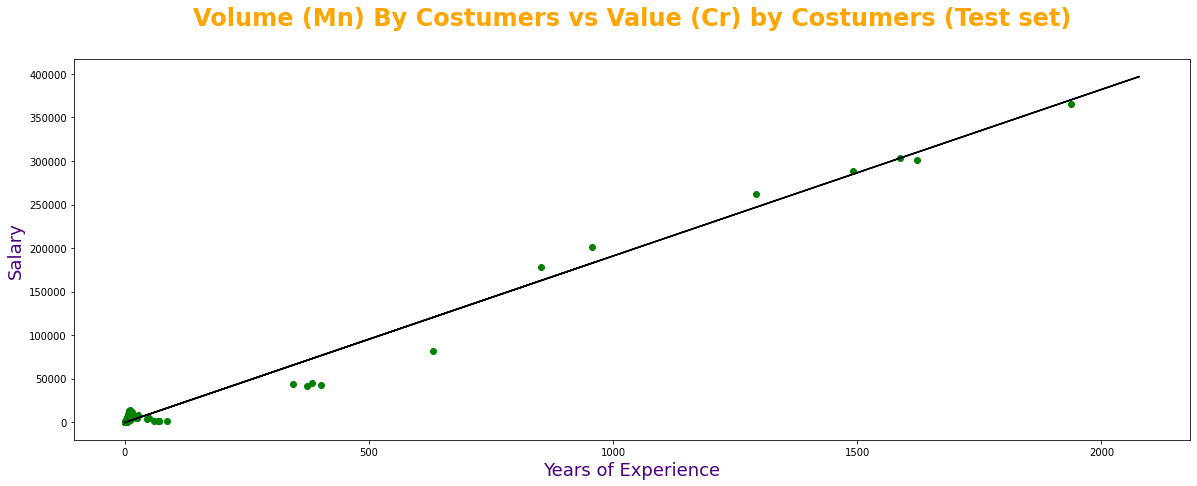

In [33]:
plt.figure(figsize=(20,7))
plt.scatter(x_test,y_test,color='green')
plt.plot(x_train,reg.predict(x_train),color='black')
plt.xlabel('Years of Experience',size=18,color='indigo')
plt.ylabel('Salary',size=18,color='indigo')
plt.title('Volume (Mn) By Costumers vs Value (Cr) by Costumers (Test set)\n',size=24,color='orange',fontweight='bold')
plt.show()

In [30]:
x = df.iloc[:,3].values.reshape(-1,1)
y = df.iloc[:,4].values
print("Show x and y")
print("--------X---------\n")
print(x)
print("--------Y---------\n")
print(y)
print("\n\n")
print("type of data of x :",type(x))
print("type of data of y :",type(y))

Show x and y
--------X---------

[[1.51200e+01]
 [1.59000e+01]
 [1.43100e+01]
 [1.15200e+01]
 [9.31000e+00]
 [7.36000e+00]
 [6.69000e+00]
 [4.06000e+00]
 [1.47000e+01]
 [3.79000e+00]
 [3.33000e+00]
 [3.71000e+00]
 [2.00000e-02]
 [2.00000e-02]
 [2.00000e-02]
 [2.00000e-02]
 [1.00000e-02]
 [1.00000e-02]
 [1.00000e-02]
 [2.00000e-02]
 [5.00000e-02]
 [5.00000e-02]
 [9.00000e-02]
 [7.61800e+01]
 [7.10400e+01]
 [6.88200e+01]
 [6.29000e+01]
 [6.06700e+01]
 [6.28300e+01]
 [5.13400e+01]
 [5.83500e+01]
 [4.91200e+01]
 [5.23800e+01]
 [4.42200e+01]
 [4.63000e+01]
 [2.00000e-02]
 [2.10000e-01]
 [1.70000e-01]
 [1.60000e-01]
 [1.30000e-01]
 [1.00000e-01]
 [8.00000e-02]
 [5.00000e-02]
 [4.00000e-02]
 [4.00000e-02]
 [4.00000e-02]
 [3.00000e-02]
 [2.00000e-02]
 [5.98500e+01]
 [7.08300e+01]
 [6.92800e+01]
 [5.91300e+01]
 [8.74900e+01]
 [7.41300e+01]
 [6.19200e+01]
 [6.89000e+01]
 [8.05200e+01]
 [7.28700e+01]
 [6.47400e+01]
 [7.19600e+01]
 [1.30000e-01]
 [6.00000e-02]
 [6.00000e-02]
 [4.00000e-02]
 [4.000

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)
reg.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred = reg.predict(x_test)
print(y_pred)

[ 8.07653859e+01  2.84969892e+05 -3.68640843e+02 -3.62903742e+02
 -3.66728476e+02 -3.57166642e+02 -3.53341908e+02 -3.70553210e+02
 -9.13476381e+01  7.09014500e+04  1.06180962e+03  3.11951644e+03
 -1.41069178e+02 -3.47604807e+02  1.20355259e+05  4.07780131e+02
 -3.70553210e+02 -3.47604807e+02 -3.60991376e+02 -3.70553210e+02
 -3.66728476e+02 -3.68640843e+02 -5.29112610e+00 -3.66728476e+02
 -1.58280481e+02 -3.49517174e+02 -3.68640843e+02  1.28764125e+04
 -3.68640843e+02 -5.69250333e+01 -3.60991376e+02 -3.64816109e+02
 -3.47604807e+02  1.62997164e+02 -2.65373029e+02  1.24749825e+02
  4.58821425e+03 -2.67285396e+02 -3.66728476e+02 -3.49517174e+02
 -3.64816109e+02 -2.69197763e+02 -2.80671964e+02 -1.18120775e+02
 -2.82584331e+02  1.62787023e+03  3.06424684e+02 -3.70553210e+02
 -2.29038057e+02 -3.68640843e+02  3.38934922e+02 -3.60991376e+02
 -3.30393505e+02 -3.49517174e+02 -3.39955339e+02 -3.51429541e+02
 -3.62903742e+02 -3.41867706e+02 -3.51429541e+02  1.63588327e+04
  1.10730505e+04 -3.51429

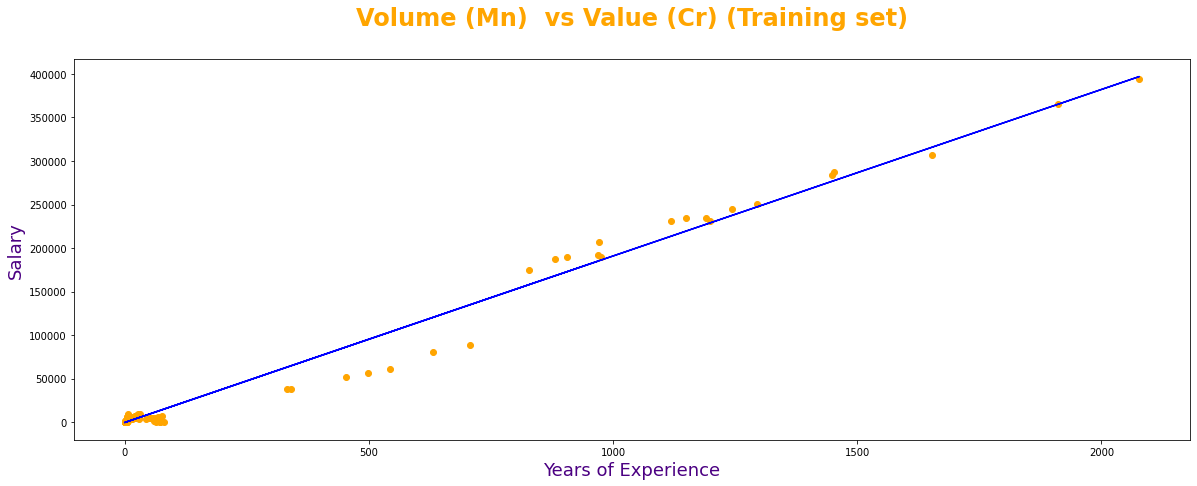

In [35]:
plt.figure(figsize=(20,7))
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.xlabel('Years of Experience',size=18,color='indigo')
plt.ylabel('Salary',size=18,color='indigo')
plt.title('Volume (Mn)  vs Value (Cr) (Training set)\n',size=24,color='orange',fontweight='bold')
plt.show()

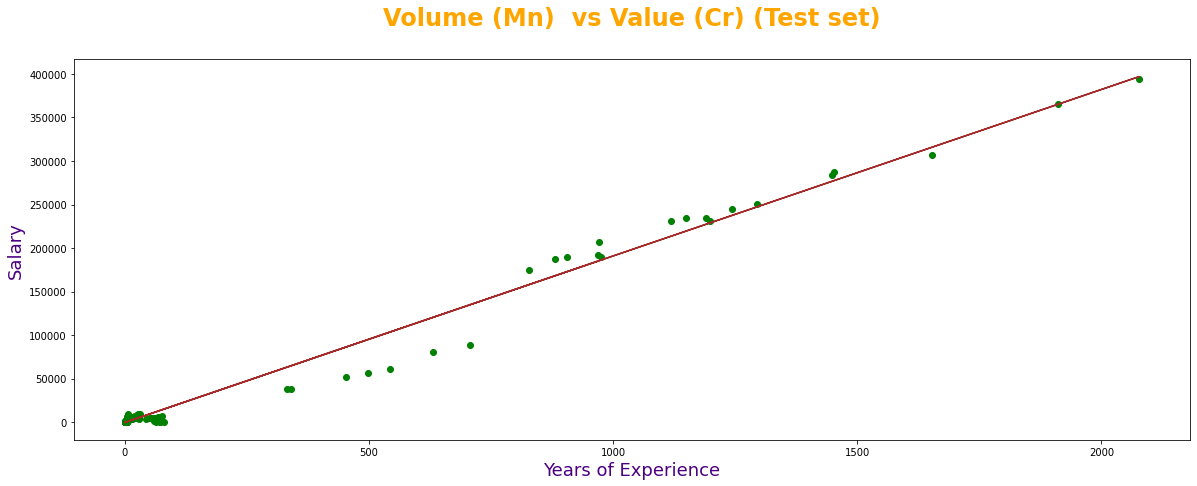

In [37]:
plt.figure(figsize=(20,7))
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,reg.predict(x_train),color='brown')
plt.xlabel('Years of Experience',size=18,color='indigo')
plt.ylabel('Salary',size=18,color='indigo')
plt.title('Volume (Mn)  vs Value (Cr) (Test set)\n',size=24,color='orange',fontweight='bold')
plt.show()